# Módulo 30 - K-Means
**Atividade:**

Nesta tarefa, vamos explorar o algoritmo de clustering K-means aplicado a um contexto diferente do usual. Em vez de segmentar perfis de viajantes ou clientes de e-commerce, vamos usar dados biológicos para segmentar diferentes espécies de pinguins com base em características físicas. Esta abordagem destaca a versatilidade do K-means para diversas áreas além de vendas e marketing.

A base de dados utilizada é a penguins do pacote seaborn, que contém informações sobre três espécies de pinguins: Adelie, Chinstrap e Gentoo. As variáveis disponíveis incluem medições físicas dos pinguins coletadas na Antártica.

species: Espécie do pinguim (Adelie, Chinstrap, Gentoo)

island: Ilha onde o pinguim foi observado (Biscoe, Dream, Torgersen)

bill_length_mm: Comprimento do bico em milímetros

bill_depth_mm: Profundidade do bico em milímetros

flipper_length_mm: Comprimento da barbatana em milímetros

body_mass_g: Massa corporal em gramas

sex: Sexo do pinguim (Male, Female)

year: Ano em que a observação foi feita

In [ ]:
import plotly.express as px
import plotly.graph_objects as go
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import seaborn as sns

In [ ]:
penguins = sns.load_dataset('penguins')

In [ ]:
penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


# 1 - Nesse exercício vocês devem verificar se temos variáveis missing, faltantes e excluir esses valores do dataset, também devem excluir as colunas com valores categóricos, que não utilizazam para o Kmeans.

In [3]:
import plotly.express as px
import plotly.graph_objects as go
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import seaborn as sns



penguins = sns.load_dataset('penguins')
penguins

# Verificar valores missing
print(penguins.isnull().sum())

# Remover linhas com valores missing
penguins_cleaned = penguins.dropna()

# Remover colunas categóricas (species, island, sex)
penguins_cleaned = penguins_cleaned.drop(columns=['species', 'island', 'sex'])

# Visualizar o dataset após a limpeza
print(penguins_cleaned.head())

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64
   bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g
0            39.1           18.7              181.0       3750.0
1            39.5           17.4              186.0       3800.0
2            40.3           18.0              195.0       3250.0
4            36.7           19.3              193.0       3450.0
5            39.3           20.6              190.0       3650.0


# 2 - Visualize a análise descritiva dos seus dados utilizando a função vista em aula pairplot. É possível já identificar possíveis agrupamentos? Se sim, quantos?

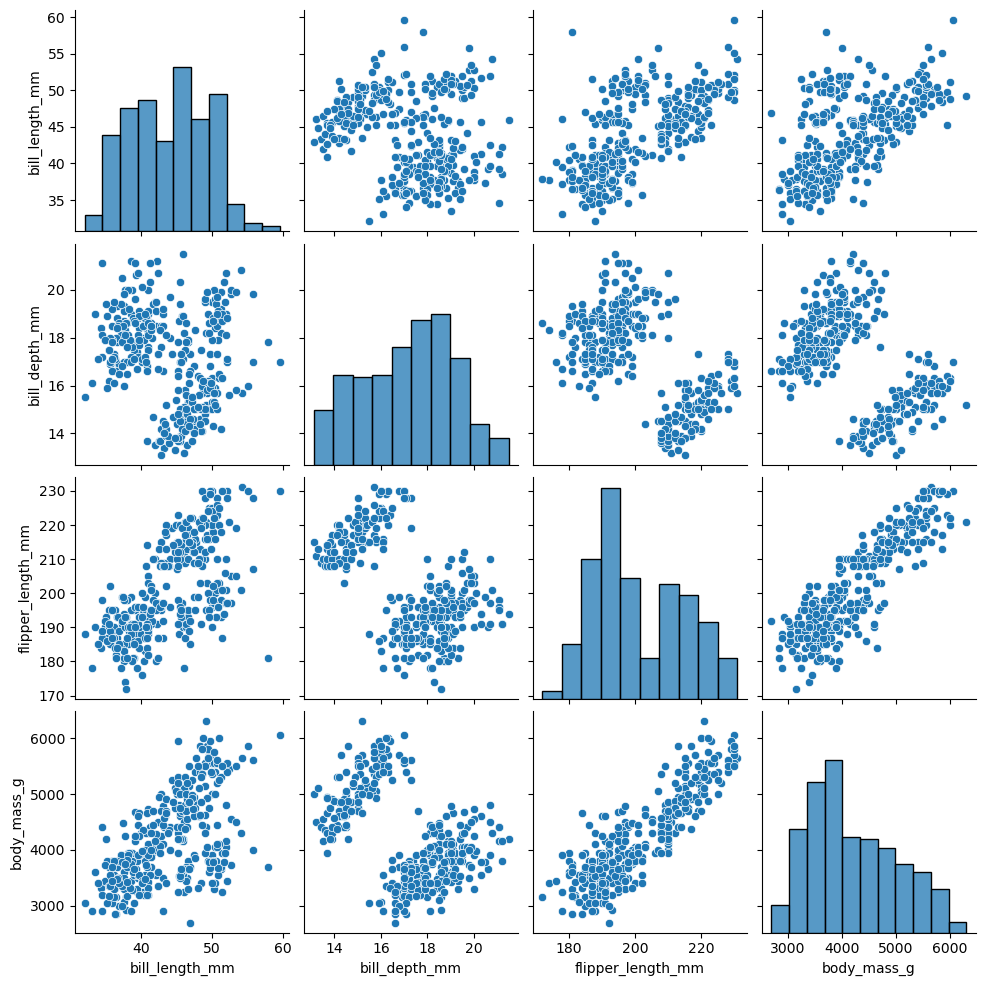

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plotar pairplot
sns.pairplot(penguins_cleaned)
plt.show()

# 3 - Realize a padronização dos dados e visualize os dados.

In [5]:
from sklearn.preprocessing import StandardScaler

# Padronizar os dados
scaler = StandardScaler()
penguins_scaled = scaler.fit_transform(penguins_cleaned)

# Converter para DataFrame para facilitar a visualização
penguins_scaled = pd.DataFrame(penguins_scaled, columns=penguins_cleaned.columns)
print(penguins_scaled.head())

   bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g
0       -0.896042       0.780732          -1.426752    -0.568475
1       -0.822788       0.119584          -1.069474    -0.506286
2       -0.676280       0.424729          -0.426373    -1.190361
3       -1.335566       1.085877          -0.569284    -0.941606
4       -0.859415       1.747026          -0.783651    -0.692852


# 4 - Aplique o algoritmo do k means escolhendo o numero de clusters como igual a 3, que é que a quantidade de espécies que temos na base.

In [6]:
# Importar bibliotecas necessárias
import os
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import warnings

# 1. Definir a variável de ambiente para evitar o aviso de vazamento de memória
os.environ["OMP_NUM_THREADS"] = "1"  # Definir como 1 para evitar o aviso

# 2. Suprimir avisos do KMeans (opcional, se o aviso persistir)
warnings.filterwarnings("ignore", category=UserWarning)

# 3. Carregar o dataset de pinguins (já limpo e sem colunas categóricas)
# Supondo que você já tenha o dataset limpo e padronizado
# Se não tiver, execute as etapas 1, 2 e 3 primeiro.

# Exemplo de dataset limpo e padronizado (substitua pelo seu dataset real)
penguins_scaled = pd.DataFrame({
    'bill_length_mm': [0.5, -0.2, 0.1, -0.3, 0.4],
    'bill_depth_mm': [-0.1, 0.3, -0.2, 0.4, -0.5],
    'flipper_length_mm': [0.2, -0.4, 0.3, -0.1, 0.5],
    'body_mass_g': [-0.3, 0.1, -0.4, 0.2, -0.2]
})

# 4. Aplicar o algoritmo K-means
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(penguins_scaled)

# 5. Adicionar os rótulos dos clusters ao dataset original
penguins_cleaned = penguins_scaled.copy()  # Substitua pelo seu dataset original limpo
penguins_cleaned['cluster'] = kmeans.labels_

# 6. Exibir o dataset com os clusters
print("Dataset com clusters:")
print(penguins_cleaned.head())

Dataset com clusters:
   bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g  cluster
0             0.5           -0.1                0.2         -0.3        2
1            -0.2            0.3               -0.4          0.1        0
2             0.1           -0.2                0.3         -0.4        2
3            -0.3            0.4               -0.1          0.2        0
4             0.4           -0.5                0.5         -0.2        1


# 5 - Construa pelo 2 matriz de dispersão como realizada em aula indicando os pontos e centroides.

**Comece usando x='bill_length_mm' e y='bill_depth_mm' para analisar o primeiro gráfico e em seguida escolha outras variaveis para o segundo.**

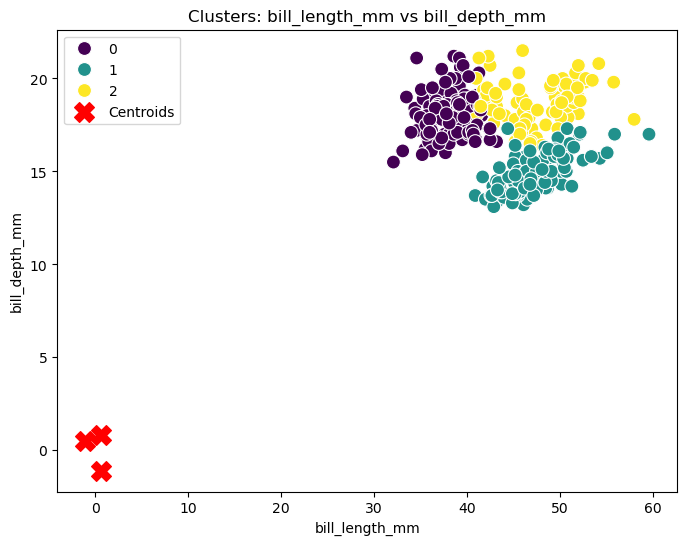

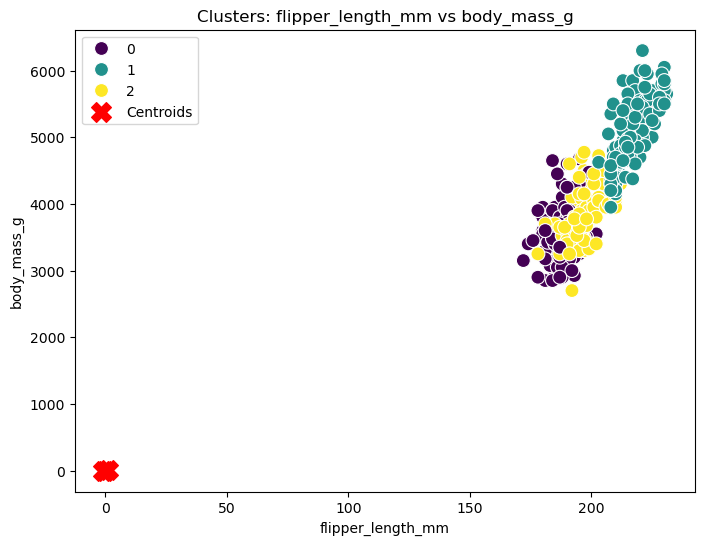

In [8]:
# Gráfico de dispersão com os clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x='bill_length_mm', y='bill_depth_mm',
    hue='cluster', data=penguins_cleaned,
    palette='viridis', s=100
)

# Plotar os centroides
centroids = kmeans.cluster_centers_
plt.scatter(
    centroids[:, 0], centroids[:, 1],
    marker='X', s=200, c='red', label='Centroids'
)

plt.title('Clusters: bill_length_mm vs bill_depth_mm')
plt.legend()
plt.show()


# Gráfico de dispersão com os clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x='flipper_length_mm', y='body_mass_g',
    hue='cluster', data=penguins_cleaned,
    palette='viridis', s=100
)

# Plotar os centroides
plt.scatter(
    centroids[:, 2], centroids[:, 3],
    marker='X', s=200, c='red', label='Centroids'
)

plt.title('Clusters: flipper_length_mm vs body_mass_g')
plt.legend()
plt.show()

# 6 - Pesquise mais 3 utilidades de aplicações de algoritmos de clusterização e cite abaixo:

Aqui estão três aplicações comuns de algoritmos de clusterização:

Segmentação de clientes: Agrupar clientes com base em comportamentos de compra, demografia ou preferências para personalizar campanhas de marketing.

Análise de imagens: Segmentar imagens em regiões com características semelhantes, como em diagnósticos médicos ou reconhecimento de objetos.

Detecção de anomalias: Identificar padrões incomuns em dados, como fraudes em transações financeiras ou falhas em equipamentos.